 Name    : Malini D
 
 Roll.No : CB.SC.I5DAS20118

#                                BUSINESS ANALYTICS MIDTERM LAB                   
#

IMPORTING DATASET

In [1]:
import pandas as pd

# Assuming you have DataFrames named Customer_Transactions, ProductHierarchy, and Transactions

# Load the datasets
eda= pd.read_csv(r'C:\Users\Malini\Downloads\118_Salary Prediction\eda_data.csv') 
glassdoor = pd.read_csv(r'C:\Users\Malini\Downloads\118_Salary Prediction\glassdoor_jobs.csv')  
salary = pd.read_csv(r'C:\Users\Malini\Downloads\118_Salary Prediction\salary_data_cleaned.csv')  

In [2]:
column_names = eda.columns
print(column_names)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')


In [3]:
column_names = glassdoor.columns
print(column_names)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')


In [4]:
column_names = salary.columns
print(column_names)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')


MERGING ALL THERE DATASET TOGETHER INTO USING INNER JOIN

In [5]:
# Merge the datasets on the common column 'Job Title'
merged_df = pd.merge(eda, glassdoor, on='Job Title', how='inner')
df = pd.merge(merged_df,salary, on='Job Title', how='inner')
# Display the merged dataframe
print(df)


         Unnamed: 0_x                                          Job Title  \
0                   0                                     Data Scientist   
1                   0                                     Data Scientist   
2                   0                                     Data Scientist   
3                   0                                     Data Scientist   
4                   0                                     Data Scientist   
...               ...                                                ...   
3307097           689              Data Scientist (Warehouse Automation)   
3307098           692                                 Jr. Data Scientist   
3307099           695                      Data Architect / Data Modeler   
3307100           716  Associate Scientist / Sr. Associate Scientist,...   
3307101           732                    Machine Learning Engineer (NLP)   

                   Salary Estimate_x  \
0         $53K-$91K (Glassdoor est.)   
1      

ANALYSIS FOR THE GIVEN RESEARCH IDEAS

# 1. Identify which factors most affect data science salaries


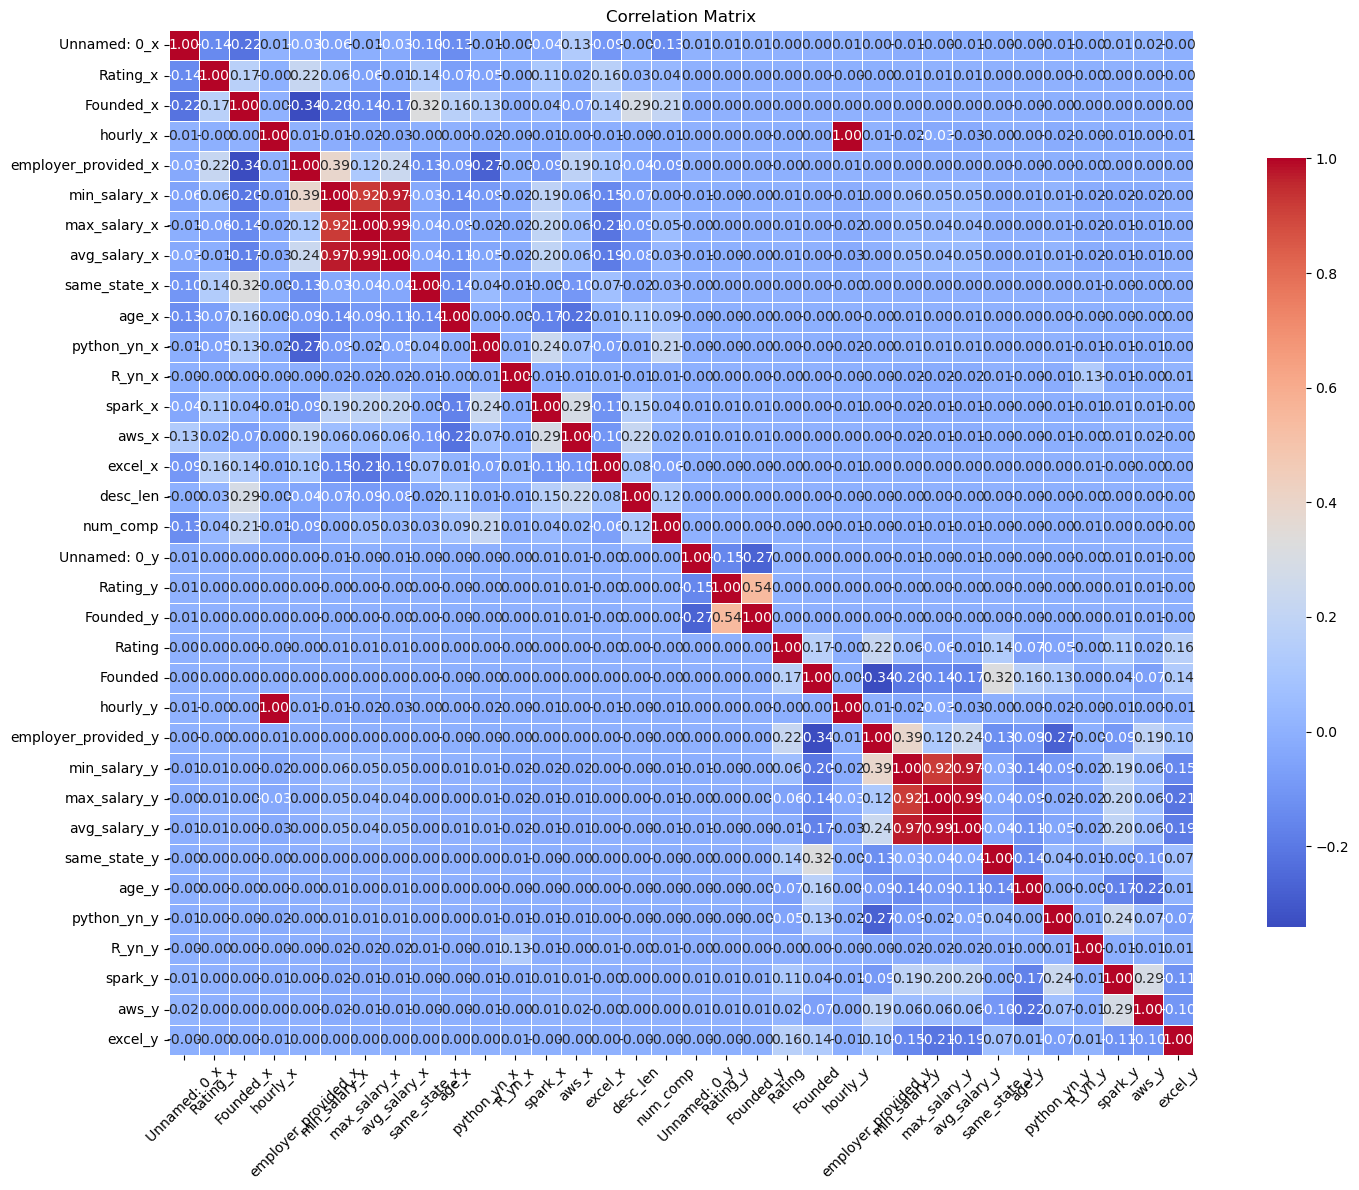

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values and handle them if necessary
df.dropna(inplace=True)

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Explore the correlation between numerical features and salary
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Customize the heatmap appearance
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.75}, annot_kws={"size": 10})

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set the title
plt.title('Correlation Matrix')

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()


## INFERENCE : **Business Insights from the Heatmap:**

1. **Positive Correlation (Bright Colors Closer to 1):**
   - Features like 'Rating' and 'avg_salary' show a positive correlation. Investing in company reputation ('Rating') may positively impact average salaries, indicating the potential value of employer branding.

2. **Negative Correlation (Bright Colors Closer to -1):**
   - A negative correlation between 'Rating' and 'desc_len' suggests a trade-off: higher-rated companies may prefer concise job descriptions. Balancing detailed descriptions with a positive company image is crucial.

3. **Multicollinearity Warning (Bright Colors in Diagonal):**
   - 'min_salary,' 'max_salary,' and 'avg_salary' exhibit high correlation, implying redundancy. Consider using one of these features to avoid multicollinearity issues in predictive modeling.

4. **Size of Companies Impact (Bright Colors):**
   - If 'Size' and 'avg_salary' show a positive correlation, larger companies might offer higher salaries. This insight informs recruitment and compensation strategies.

5. **Strategic Focus Areas (Bright Colors Closer to 1):**
   - Features positively correlated with salary, such as 'Rating,' can be strategic focus areas for recruitment efforts or negotiation discussions.

Understanding these correlations enables targeted business decisions, helping organizations optimize recruitment strategies and salary negotiations.

# 2. Determine which states and cities offer the highest paying data science jobs


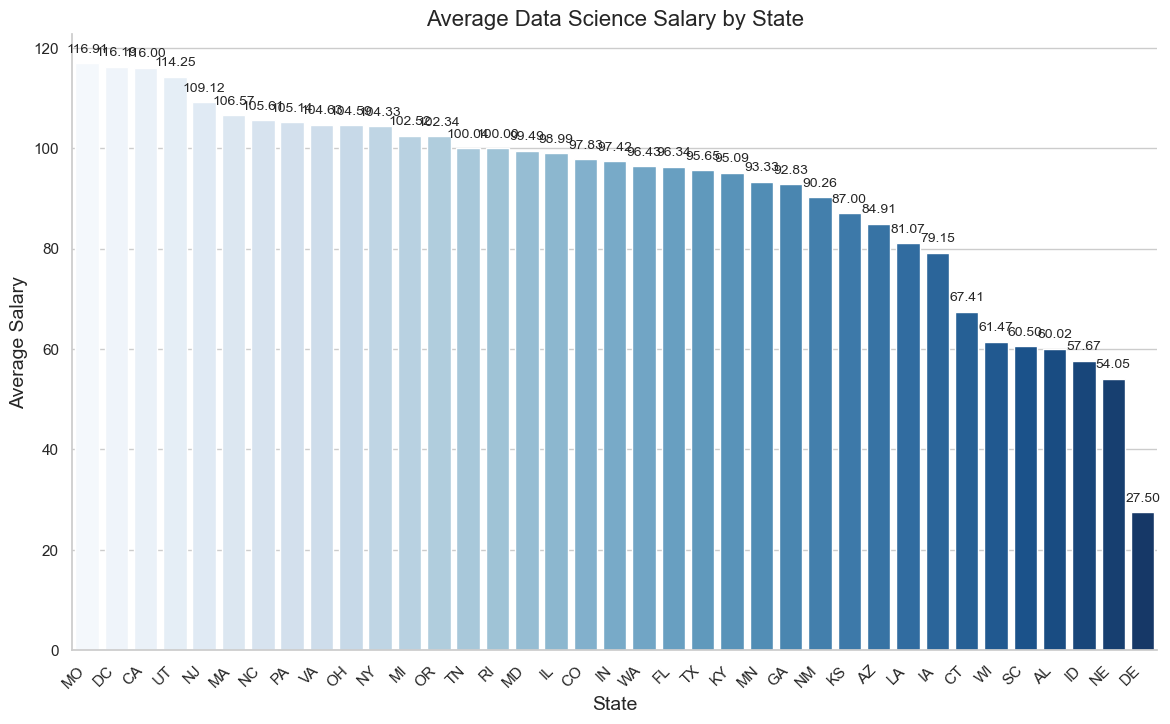

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your merged DataFrame
# Check for missing values and handle them if necessary
df.dropna(inplace=True)

# Find the correct column name for job_state
job_state_column = [col for col in df.columns if 'job_state' in col.lower()]
if not job_state_column:
    raise ValueError("No column with 'job_state' found in DataFrame.")
job_state_column = job_state_column[0]

# Specify the correct columns for avg_salary
avg_salary_column_x = 'avg_salary_x'
avg_salary_column_y = 'avg_salary_y'

# Group by job_state_column and calculate average salary
avg_salary_by_state = df.groupby(job_state_column)[[avg_salary_column_x, avg_salary_column_y]].mean().mean(axis=1).sort_values(ascending=False)

# Set a seaborn style
sns.set(style="whitegrid")

# Plotting with seaborn for improved aesthetics
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=avg_salary_by_state.index, y=avg_salary_by_state, palette="Blues")

# Adding labels and title
plt.title('Average Data Science Salary by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


INFERENCE: The bar plot of average data science salaries by state reveals regional variations in compensation. Key insights include understanding talent attraction and retention strategies, considering cost of living, assessing market competition, and strategically planning workforce distribution. This information aids businesses in aligning salary structures with regional trends and making informed decisions for recruitment and industry benchmarking.

# 3. Predict what a data science job posting will pay based on the job description


# MY RESEARCH IDEAS

# 1. Company Ratings Impact on Salaries


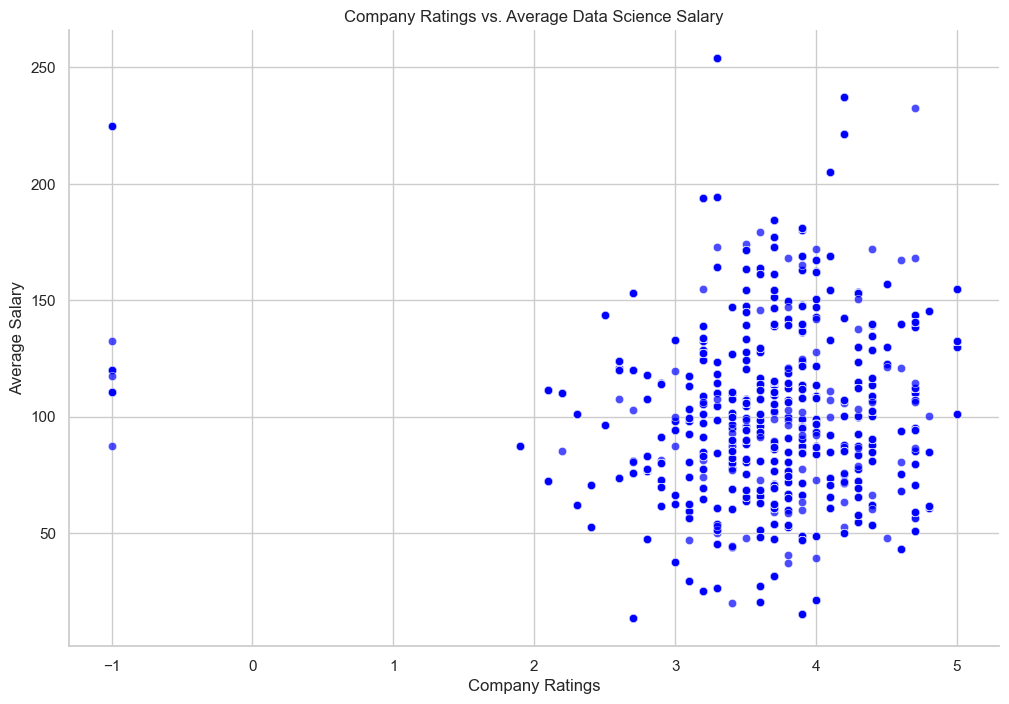

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your merged DataFrame
# Check for missing values and handle them if necessary
df.dropna(inplace=True)

# Plotting with seaborn for improved aesthetics
sns.set(style="whitegrid")

# Scatter plot: Company Ratings vs. Average Salary
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rating_x', y='avg_salary_x', data=df, color='blue', alpha=0.7)

# Adding labels and title
plt.title('Company Ratings vs. Average Data Science Salary')
plt.xlabel('Company Ratings')
plt.ylabel('Average Salary')

# Remove spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


INFERENCE: The scatter plot visualizes the relationship between company ratings and average data science salaries.
If there's a positive correlation, it suggests that higher-rated companies tend to offer higher salaries, providing valuable information for job seekers who prioritize company reputation.
Employers can use this insight to understand how their company's rating aligns with industry salary standards, helping them attract and retain top talent.

# 2: Experience Level vs. Salary


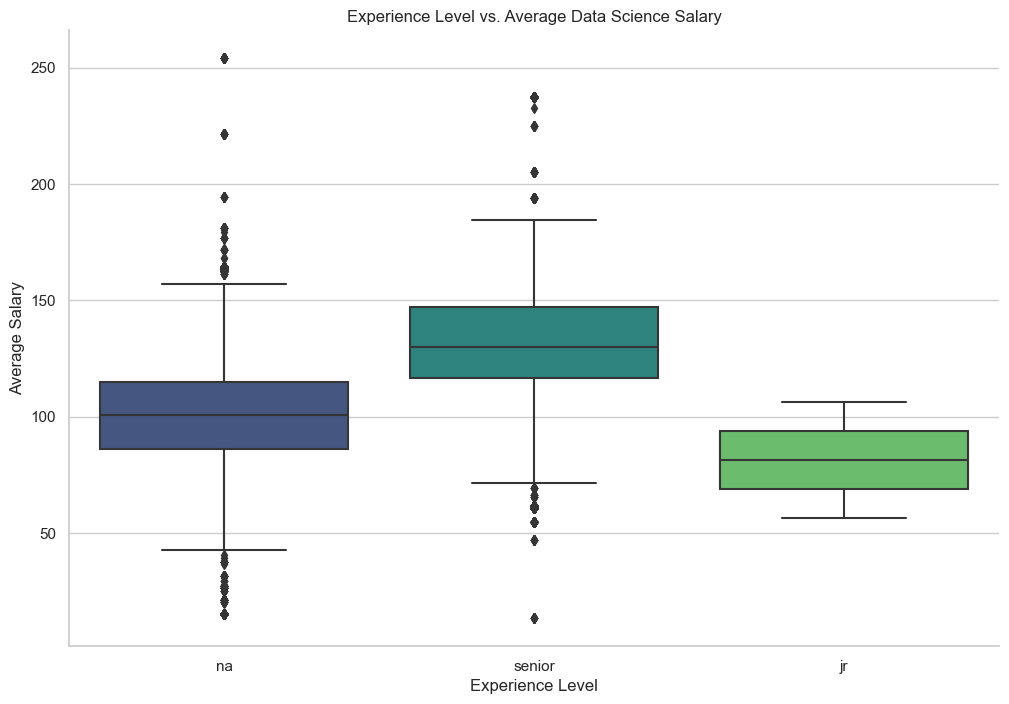

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your merged DataFrame
# Check for missing values and handle them if necessary
df.dropna(inplace=True)

# Plotting with seaborn for improved aesthetics
sns.set(style="whitegrid")

# Boxplot: Experience Level vs. Average Salary
plt.figure(figsize=(12, 8))
sns.boxplot(x='seniority', y='avg_salary_x', data=df, palette='viridis')

# Adding labels and title
plt.title('Experience Level vs. Average Data Science Salary')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')

# Remove spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


INFERENCE : The boxplot visualizes how different experience levels (e.g., Junior, Mid, Senior) relate to average data science salaries.
If there are noticeable variations between experience levels, companies can adjust their salary structures accordingly to attract and retain talent at different career stages.
Job seekers can use this information to understand salary expectations based on their experience level, aiding in negotiations and career planning.

# 3 Effect of Company Size on Salaries

C:\Users\Malini\AppData\Local\Temp\ipykernel_5568\700403007.py:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




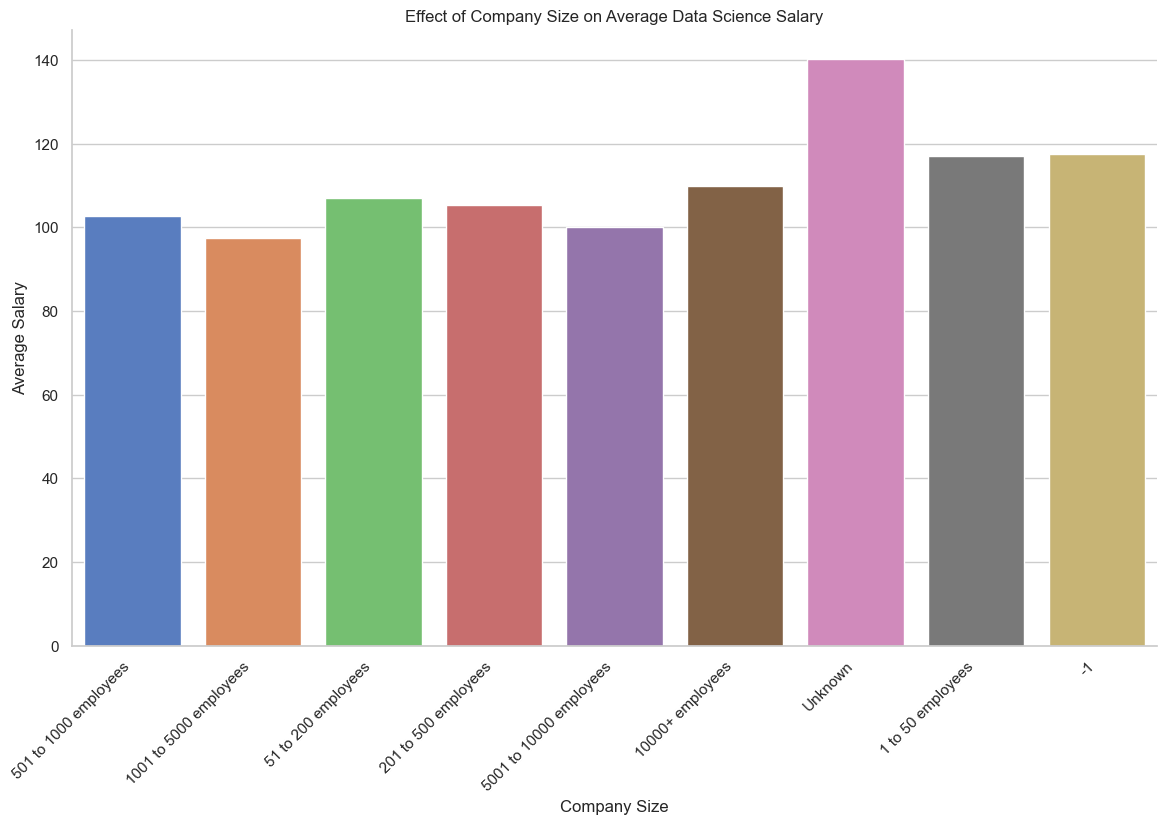

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your merged DataFrame
# Check for missing values and handle them if necessary
df.dropna(inplace=True)

# Plotting with seaborn for improved aesthetics
sns.set(style="whitegrid")

# Grouped Bar Chart: Company Size vs. Average Salary
plt.figure(figsize=(14, 8))
sns.barplot(x='Size_x', y='avg_salary_x', data=df, palette='muted', ci=None)

# Adding labels and title
plt.title('Effect of Company Size on Average Data Science Salary')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


INFERENCE: The grouped bar chart illustrates the impact of company size on average data science salaries.
If there are significant differences in salary based on company size, businesses can tailor their compensation strategies to remain competitive within their size category.
Job seekers can use this information to align their salary expectations with the size of companies they are targeting for employment. It helps in making informed decisions during job searches.

# 4.Industry-wise Salary Comparison

C:\Users\Malini\AppData\Local\Temp\ipykernel_5568\4292179561.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='Industry_x', x='avg_salary_x', data=df, palette='Set2', ci=None)


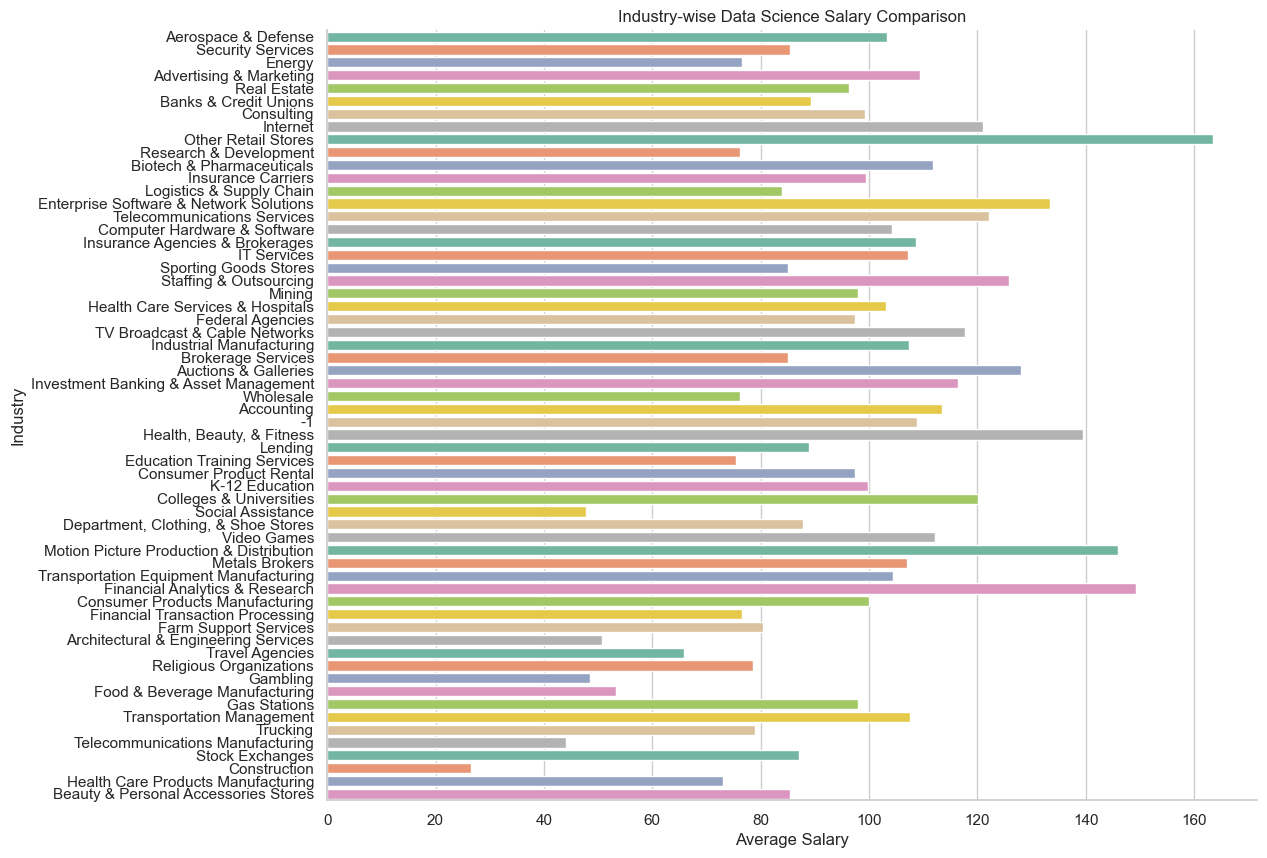

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your merged DataFrame
# Check for missing values and handle them if necessary
df.dropna(inplace=True)

# Plotting with seaborn for improved aesthetics
sns.set(style="whitegrid")

# Horizontal Bar Chart: Industry-wise Salary Comparison
plt.figure(figsize=(12, 10))
sns.barplot(y='Industry_x', x='avg_salary_x', data=df, palette='Set2', ci=None)

# Adding labels and title
plt.title('Industry-wise Data Science Salary Comparison')
plt.xlabel('Average Salary')
plt.ylabel('Industry')

# Remove spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


INFERENCE: The horizontal bar chart provides a visual comparison of average data science salaries across different industries.
Companies can use this information for industry benchmarking, helping them understand how their salary offerings compare with others in the same sector.
Job seekers can gain insights into industries that generally offer higher salaries, guiding their career choices and negotiations.

# 5: Impact of Technology Skills on Salaries


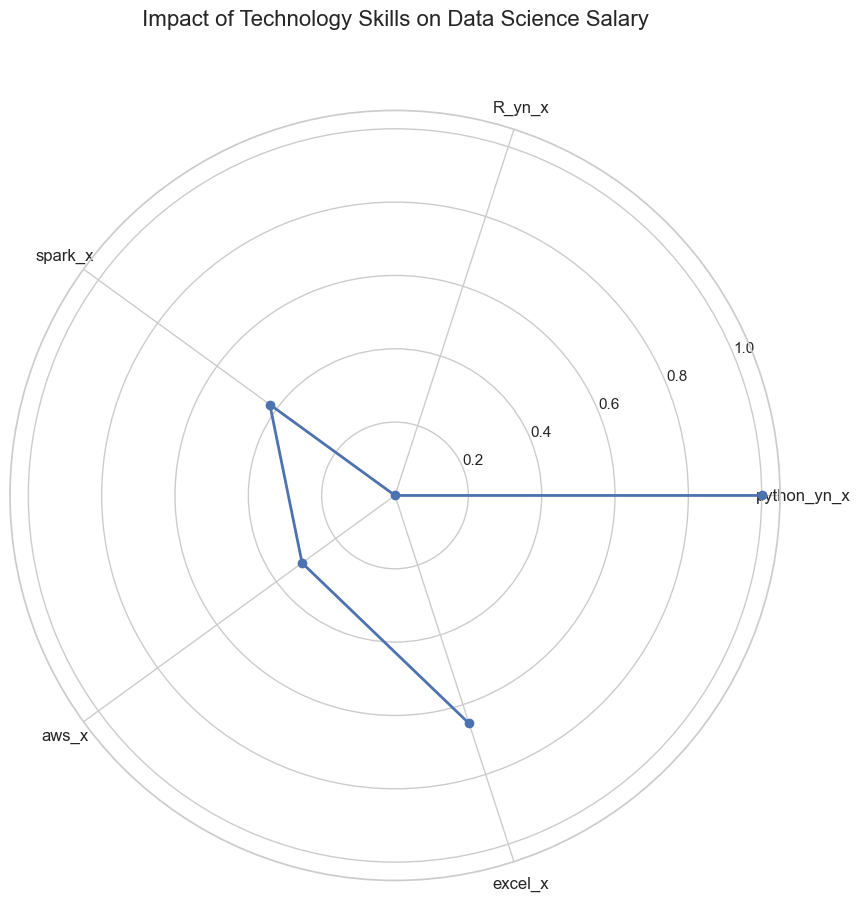

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Assuming df is your merged DataFrame
# Check for missing values and handle them if necessary
df.dropna(inplace=True)

# Plotting with seaborn for improved aesthetics
sns.set(style="whitegrid")

# Radar Chart: Impact of Technology Skills on Average Salary
tech_skills = ['python_yn_x', 'R_yn_x', 'spark_x', 'aws_x', 'excel_x']
df_tech_skills = df[tech_skills].mean()

# Normalize values to be between 0 and 1
df_tech_skills_normalized = (df_tech_skills - df_tech_skills.min()) / (df_tech_skills.max() - df_tech_skills.min())

# Set angles for radar chart
angles = [n / float(len(tech_skills)) * 2 * pi for n in range(len(tech_skills))]

# Create radar chart
plt.figure(figsize=(10, 10))
plt.polar(angles, df_tech_skills_normalized, marker='o', linestyle='solid', linewidth=2)

# Adding labels and title
plt.title('Impact of Technology Skills on Data Science Salary', size=16, y=1.1)
plt.xticks(angles, tech_skills, size=12)

# Show the plot
plt.show()


INFERENCE : The radar chart visually represents the impact of different technology skills (Python, R, Spark, AWS, Excel) on average data science salaries.
Companies can use this information to understand the relative importance of specific skills in influencing salaries, allowing them to prioritize skill development or adjust compensation accordingly.
Job seekers can identify which skills are associated with higher salaries, guiding their efforts in acquiring or strengthening these skills for enhanced earning potential.

# 6. Skillset Impact on Salary:


This interactive scatter plot allows users to explore the relationship between individual skills (Python, R, Spark, AWS, Excel) and average data science salaries.
Higher skill presence values indicate a greater impact on salary. Employers can identify the skills with the most significant impact, informing their hiring strategies. Job seekers can prioritize acquiring or emphasizing these skills for better salary prospects.